# Demo: TensorFlow を使った手書き文字認識

## 問題設定

手書きの数字の画像が与えられたとき，それが 1~9 のどれであるかを判別する．

<img src=img/MNIST.png>

## Softmax Regression

### 学習

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(0)
tf.set_random_seed(0)

# Load MNIST data set
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Create placeholder
x_ph = tf.placeholder("float", [None, 784])
y_ph = tf.placeholder("float", [None,10])

logits = tf.contrib.layers.fully_connected(x_ph, 10, activation_fn=None)
y = tf.nn.softmax(logits)

cross_entropy = -tf.reduce_sum(y_ph * tf.log(y))
pred_sr = tf.argmax(y, 1)
correct_prediction = tf.equal(tf.argmax(y_ph, 1), pred_sr)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Create optimizer
train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)

# Create variable initializer
init = tf.initialize_all_variables()

# Create session
sess = tf.Session()
sess.run(init)

sess.run(init)
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x_ph: batch_xs, y_ph: batch_ys})
print "Accuracy:", sess.run(accuracy, feed_dict={x_ph: mnist.test.images, y_ph: mnist.test.labels})

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Accuracy: 0.9168


### 予測

In [3]:
%matplotlib inline

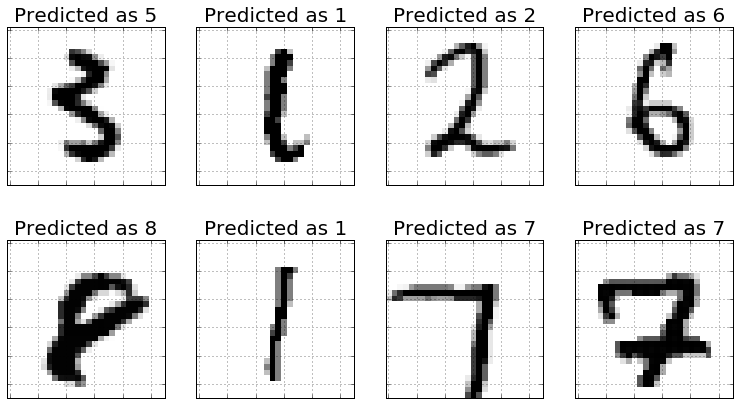

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

n_row = 2
n_col = 4

pred = sess.run(pred_sr, feed_dict={x_ph: mnist.test.images})
ind = np.random.choice(1000, n_row*n_col, replace=False)

plt.figure(figsize=(13, 7))
for i in range(n_row*n_col):
    pos = int(str(n_row) + str(n_col) + str(i+1))
    plt.subplot(pos)
    plt.imshow(mnist.test.images[ind[i]].reshape([28, 28]), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Predicted as {}".format(pred[ind[i]]), fontsize=20)
    plt.grid()
    plt.tick_params(labelbottom='off', labelleft='off')
plt.show()

## Data Handling

MNIST データセットは画像を各セルの色の濃さで数値化している．

<img src=img/MNIST-Matrix.png width=700px>

さらに，一般的な機械学習手法で扱うために 28 x 28 の行列のデータを平らにして 1 x 784 のデータとして扱っている．

In [ ]:
import pandas as pd

mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
xs, ys = mnist.train.next_batch(10)
df = pd.DataFrame(xs)
df["label"] = ys
df

この場合，セルが隣り合っているかどうかなどの情報を一部捨てている形になってしまっているが，畳み込みニューラルネットなどのもう少し高度な手法ではデータを 28 x 28 の形式のまま入力することができ，より高い精度の予測モデルが得られる．

## Resources

* [MNIST for ML Beginners](https://www.tensorflow.org/versions/master/tutorials/mnist/beginners/index.html)